OASIS BRAIN IMAGING DATASET ANALYSIS

CROSS-SECTIONAL DATASET:
Shape: (436, 12)
Columns: ['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Delay']

LONGITUDINAL DATASET:
Shape: (373, 15)
Columns: ['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

Cross-sectional - First 5 rows:
              ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   

   Delay  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  

Longitudinal - First 5 rows:
  Subject ID         MRI ID        Group  Visit  MR Del

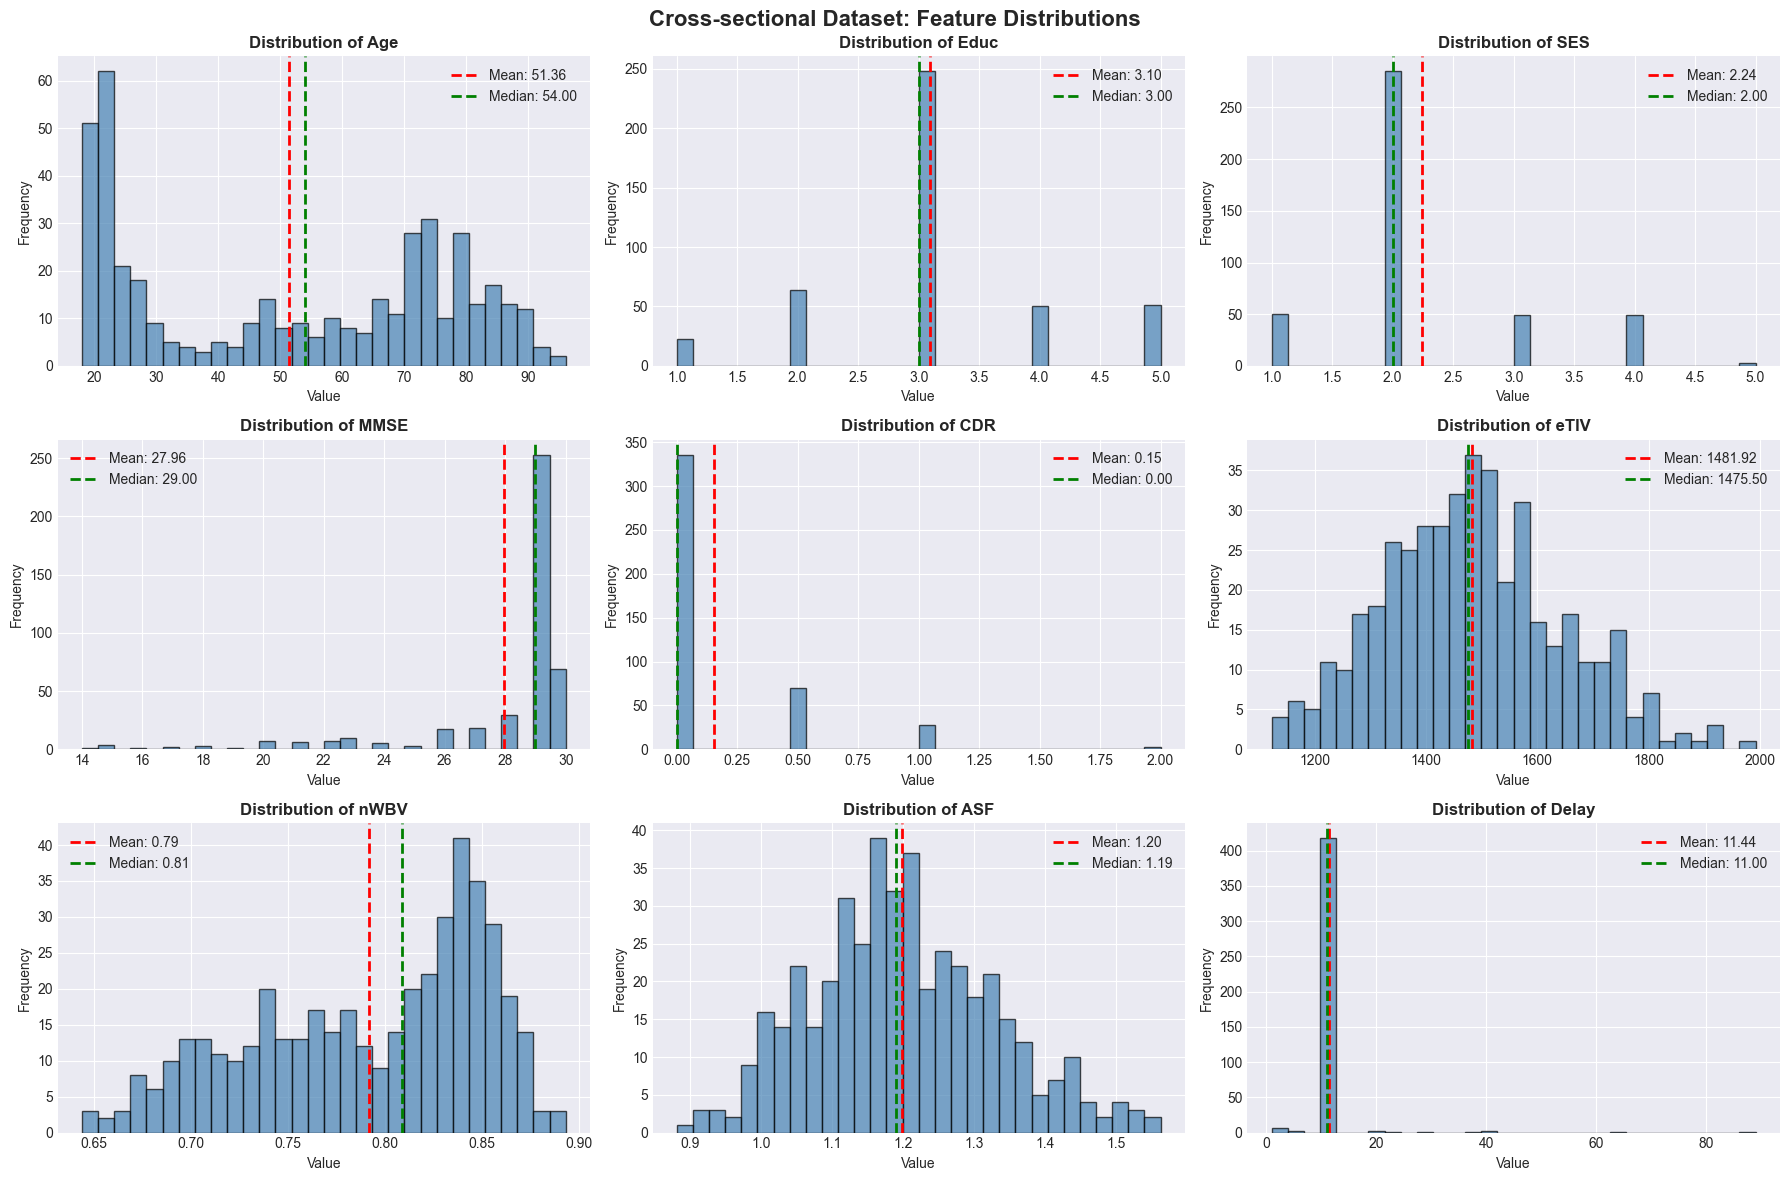


Skewness Analysis:

Cross-sectional Dataset:
Delay    10.134898
CDR       2.305729
SES       1.026074
ASF       0.286110
eTIV      0.266392
Educ      0.236426
Age      -0.000483
nWBV     -0.520533
MMSE     -2.646871
dtype: float64

Longitudinal Dataset:
CDR         1.319318
Visit       1.041023
MR Delay    0.945037
eTIV        0.496881
SES         0.284587
nWBV        0.234587
Age         0.141700
ASF         0.083450
EDUC       -0.025977
MMSE       -2.375332
dtype: float64

TARGET VARIABLE ANALYSIS (Clinical Dementia Rating)


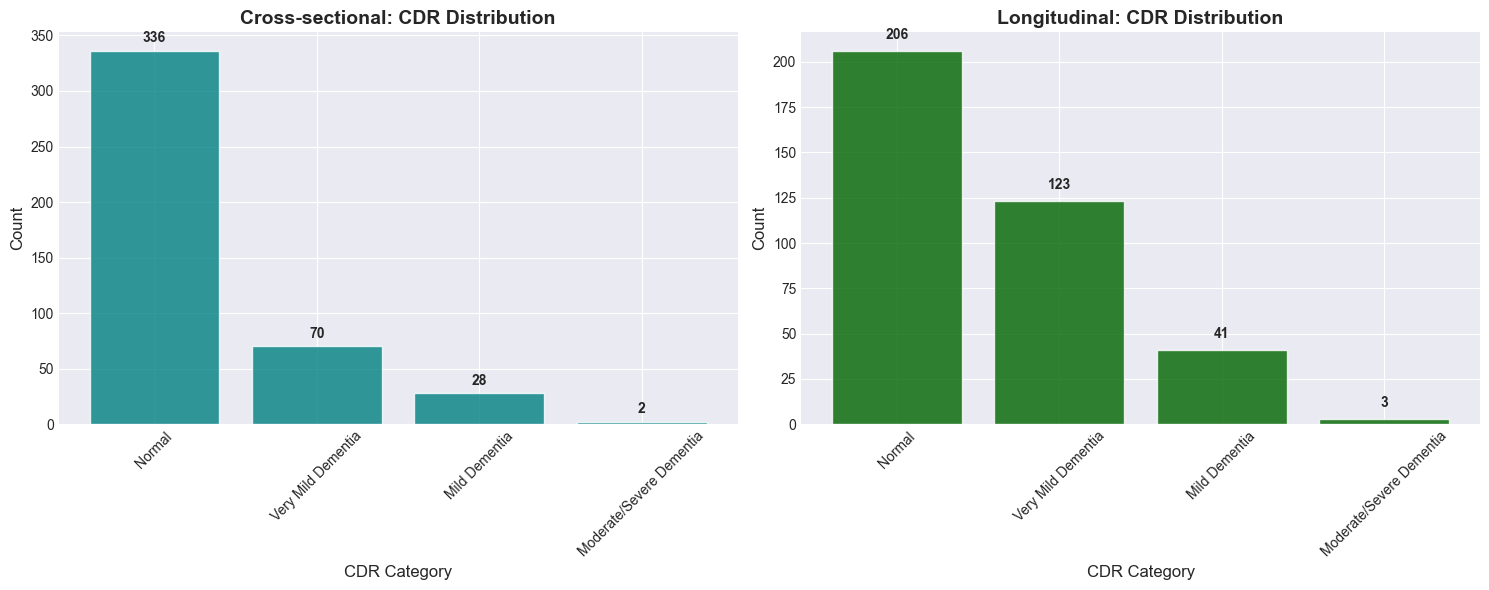


CDR Distribution Summary:

Cross-sectional:
CDR_Category
Normal                      336
Very Mild Dementia           70
Mild Dementia                28
Moderate/Severe Dementia      2
Name: count, dtype: int64

Percentages:
CDR_Category
Normal                      77.06
Very Mild Dementia          16.06
Mild Dementia                6.42
Moderate/Severe Dementia     0.46
Name: count, dtype: float64

Longitudinal:
CDR_Category
Normal                      206
Very Mild Dementia          123
Mild Dementia                41
Moderate/Severe Dementia      3
Name: count, dtype: int64

Percentages:
CDR_Category
Normal                      55.23
Very Mild Dementia          32.98
Mild Dementia               10.99
Moderate/Severe Dementia     0.80
Name: count, dtype: float64

DEMOGRAPHIC ANALYSIS


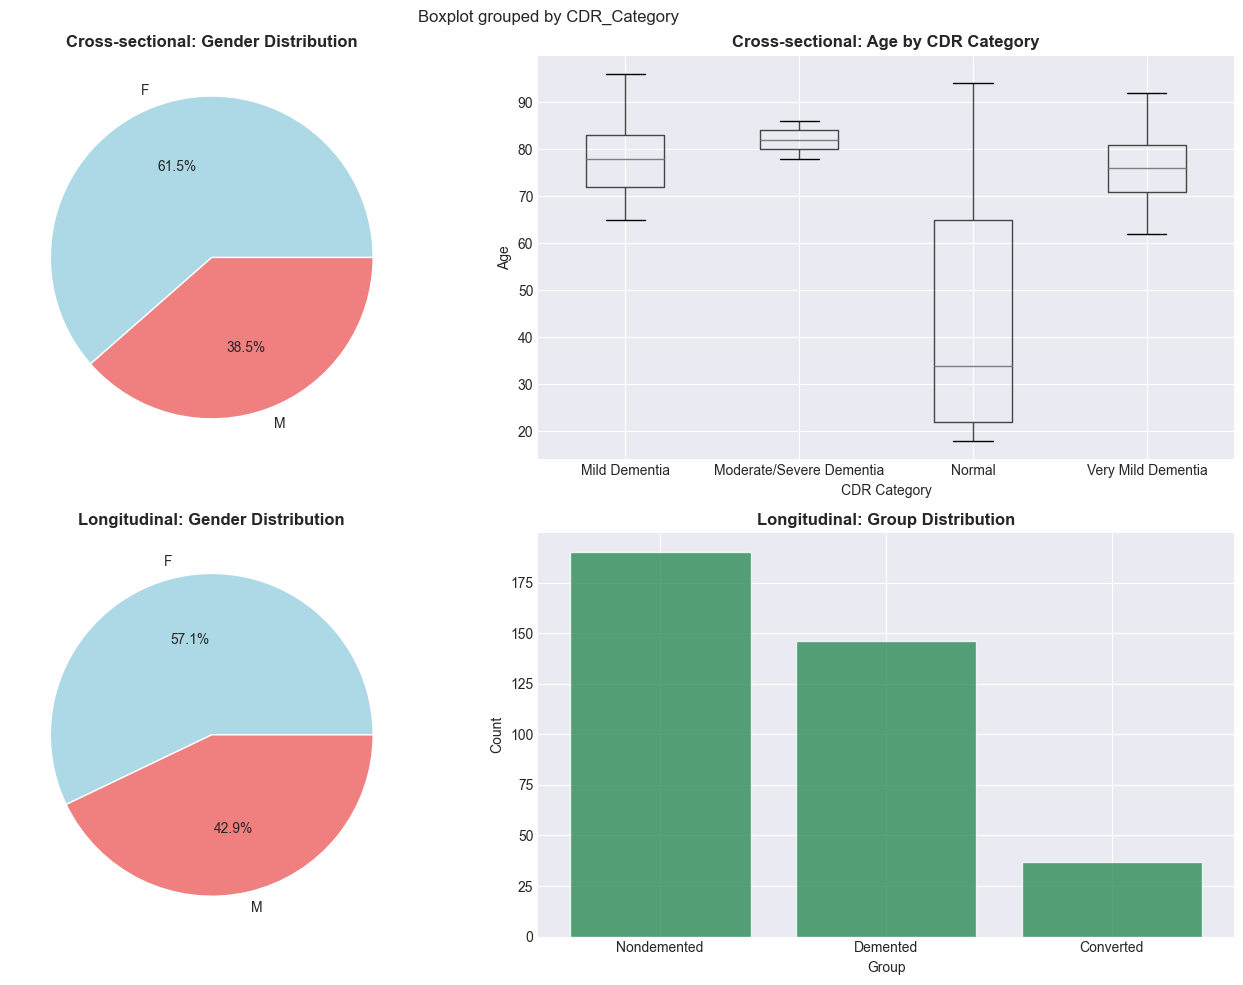


CORRELATION ANALYSIS


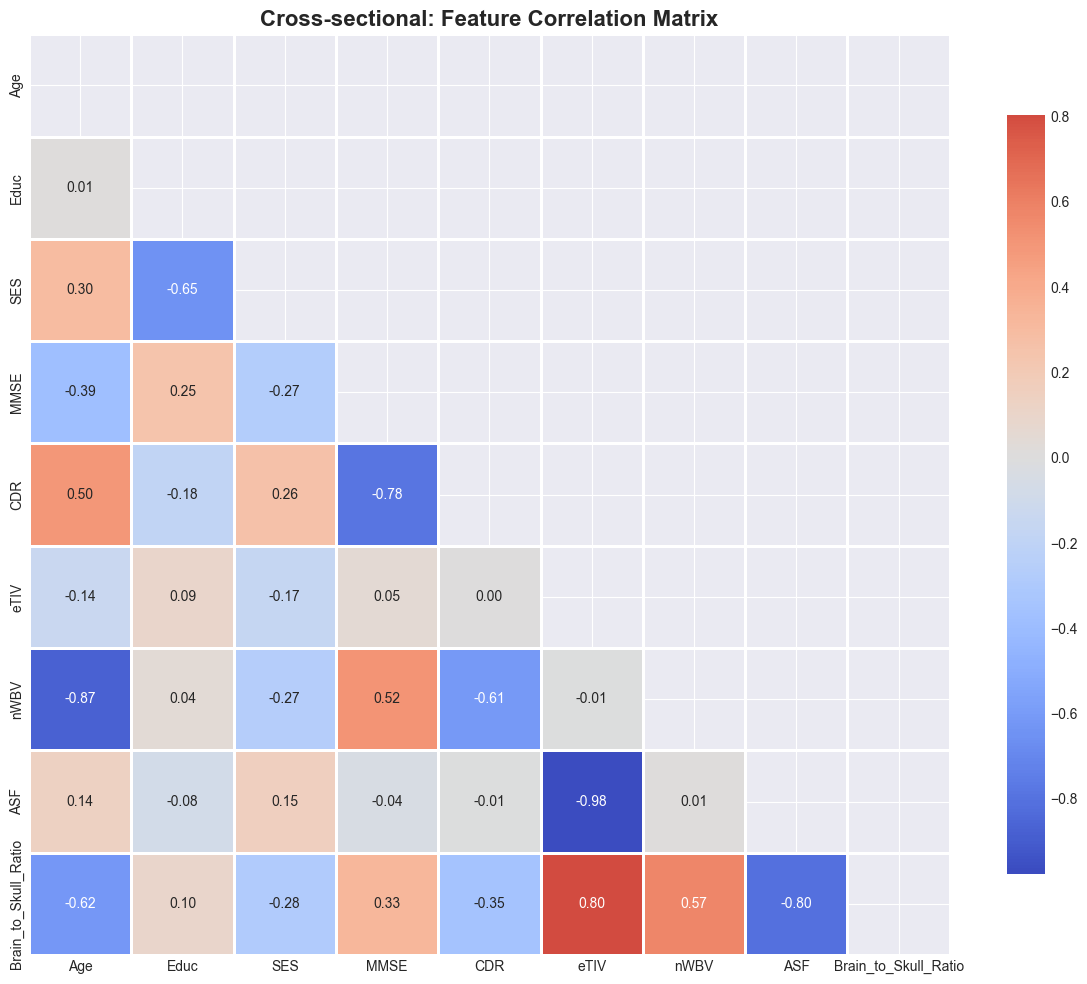


Top Features Correlated with CDR (Cross-sectional):
Age                     0.499826
SES                     0.262628
eTIV                    0.000523
ASF                    -0.008329
Educ                   -0.184651
Brain_to_Skull_Ratio   -0.352341
nWBV                   -0.608921
MMSE                   -0.781993
Name: CDR, dtype: float64


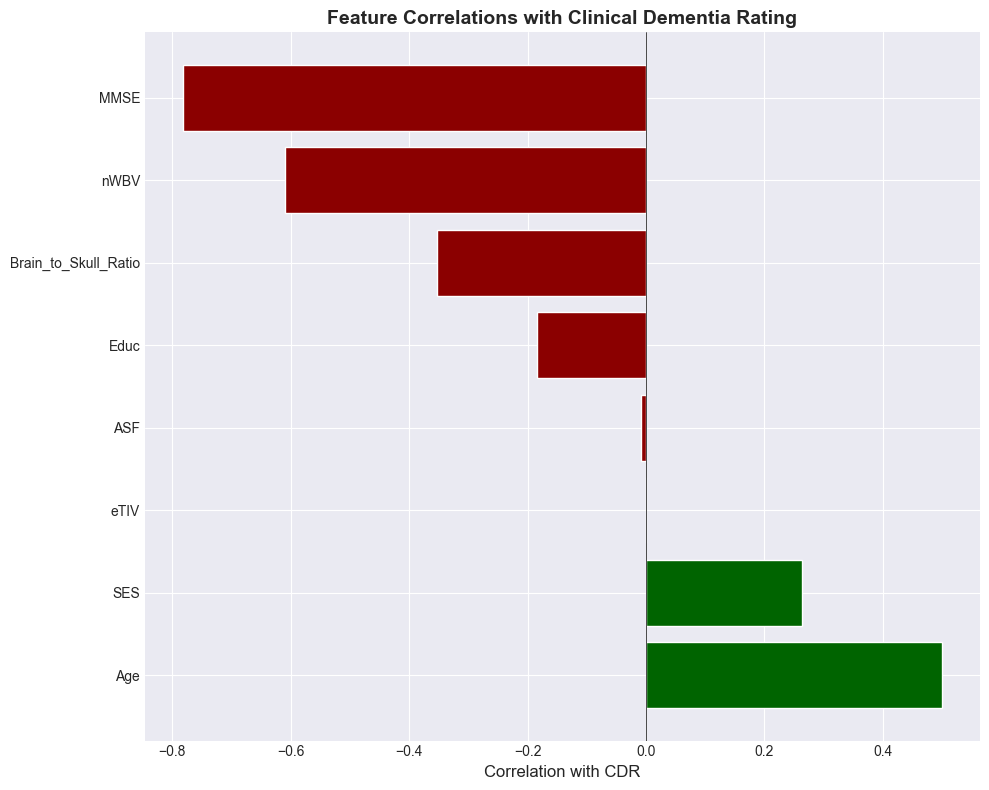


BRAIN IMAGING METRICS ANALYSIS


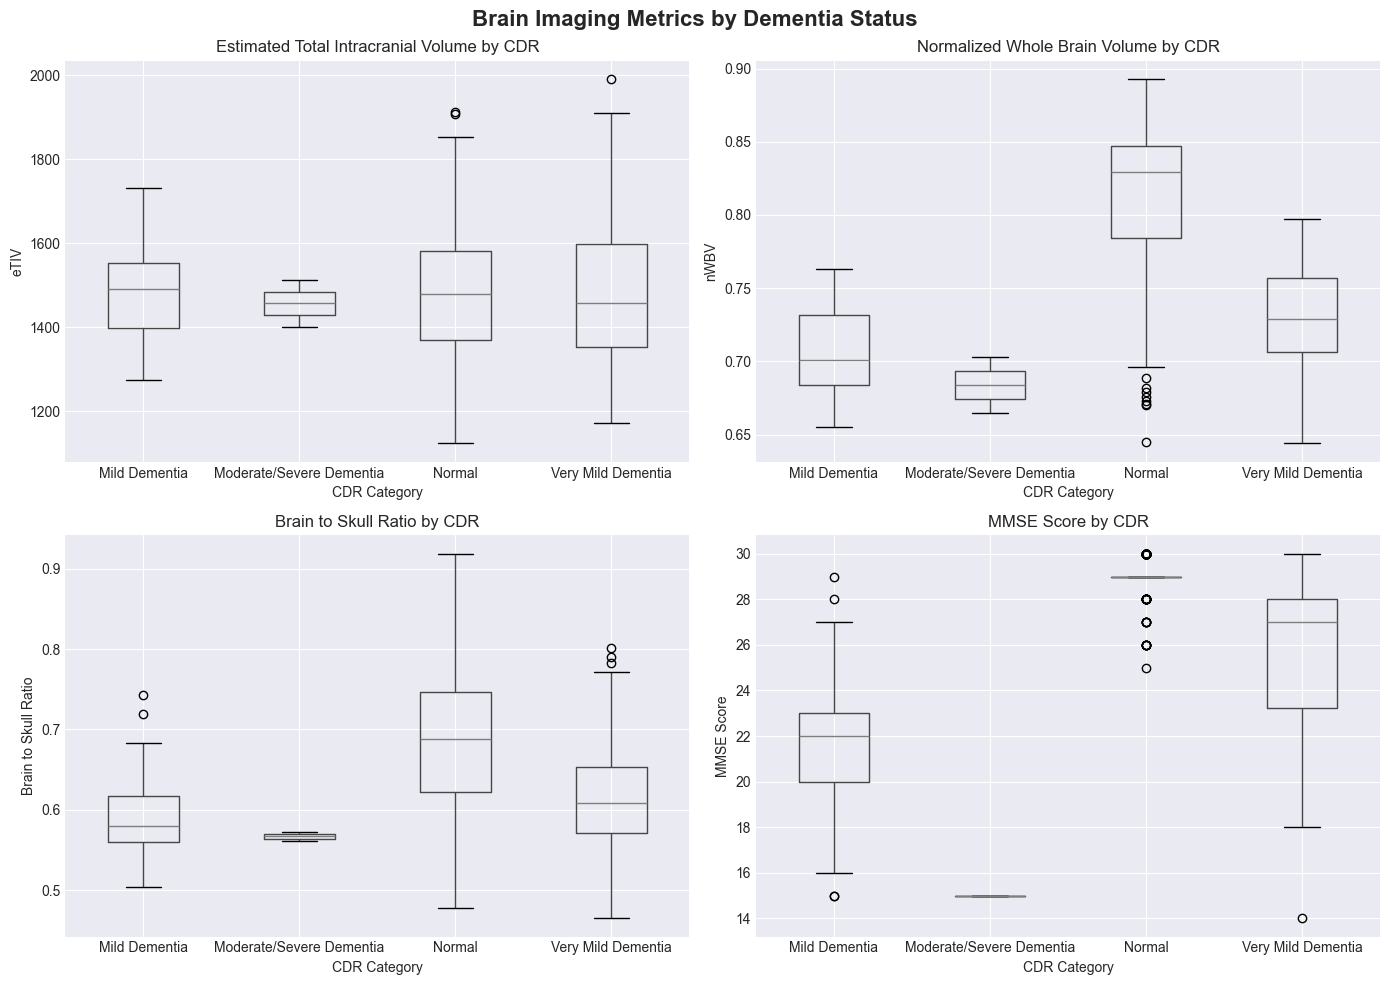


LONGITUDINAL ANALYSIS

Subjects with multiple visits: 150
Total unique subjects: 150


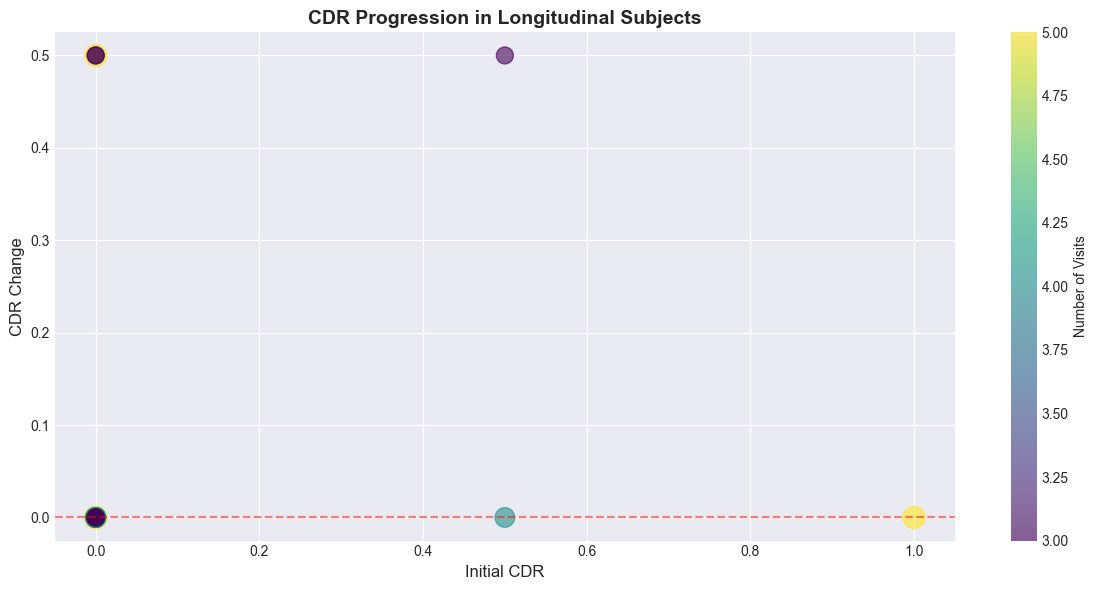


OUTLIER DETECTION

Cross-sectional Outliers:
       count  percentage  lower_bound  upper_bound
Educ   188.0   43.119266        3.000        3.000
SES    151.0   34.633028        2.000        2.000
CDR    100.0   22.935780        0.000        0.000
MMSE    67.0   15.366972       26.500       30.500
Delay   20.0    4.587156       11.000       11.000
eTIV     4.0    0.917431     1050.500     1896.500
ASF      2.0    0.458716        0.853        1.543


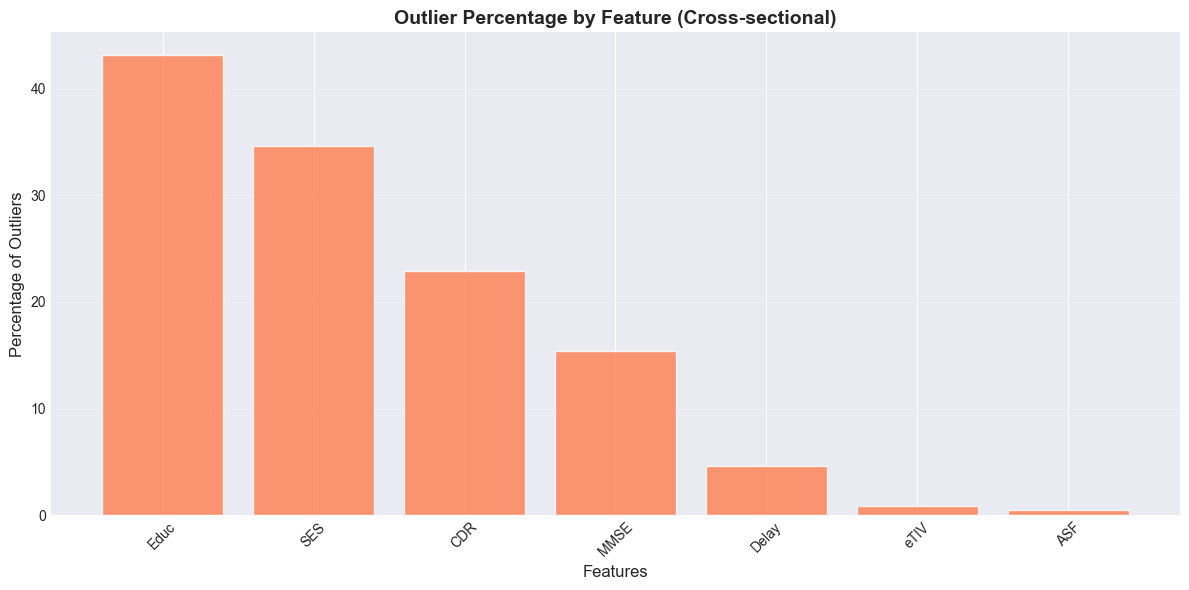


FEATURE IMPORTANCE ANALYSIS

1. Mutual Information Scores:
  Feature  MI_Score
3    MMSE  0.286519
5    nWBV  0.238609
0     Age  0.213921
1    Educ  0.093276
2     SES  0.050622
6     ASF  0.035568
4    eTIV  0.031872


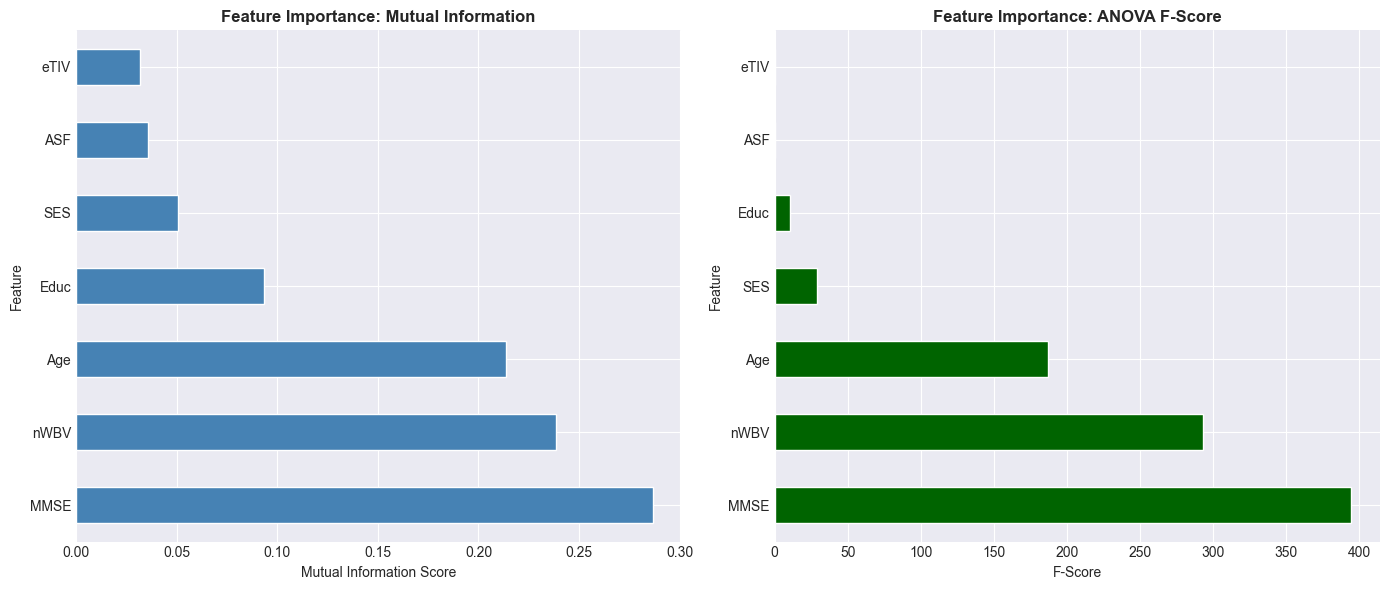


STATISTICAL TESTS

1. Kruskal-Wallis Test (Non-parametric ANOVA):
Testing if brain metrics differ significantly across CDR categories

nWBV:
  H-statistic: 159.1949
  P-value: 0.0000
  Significant difference? Yes

MMSE:
  H-statistic: 183.3672
  P-value: 0.0000
  Significant difference? Yes

Age:
  H-statistic: 122.3671
  P-value: 0.0000
  Significant difference? Yes


2. Chi-Square Test for Independence:
Testing association between gender and dementia presence
Chi-square statistic: 0.2122
P-value: 0.6451
Degrees of freedom: 1
Significant association? No

DIMENSIONALITY REDUCTION (PCA)


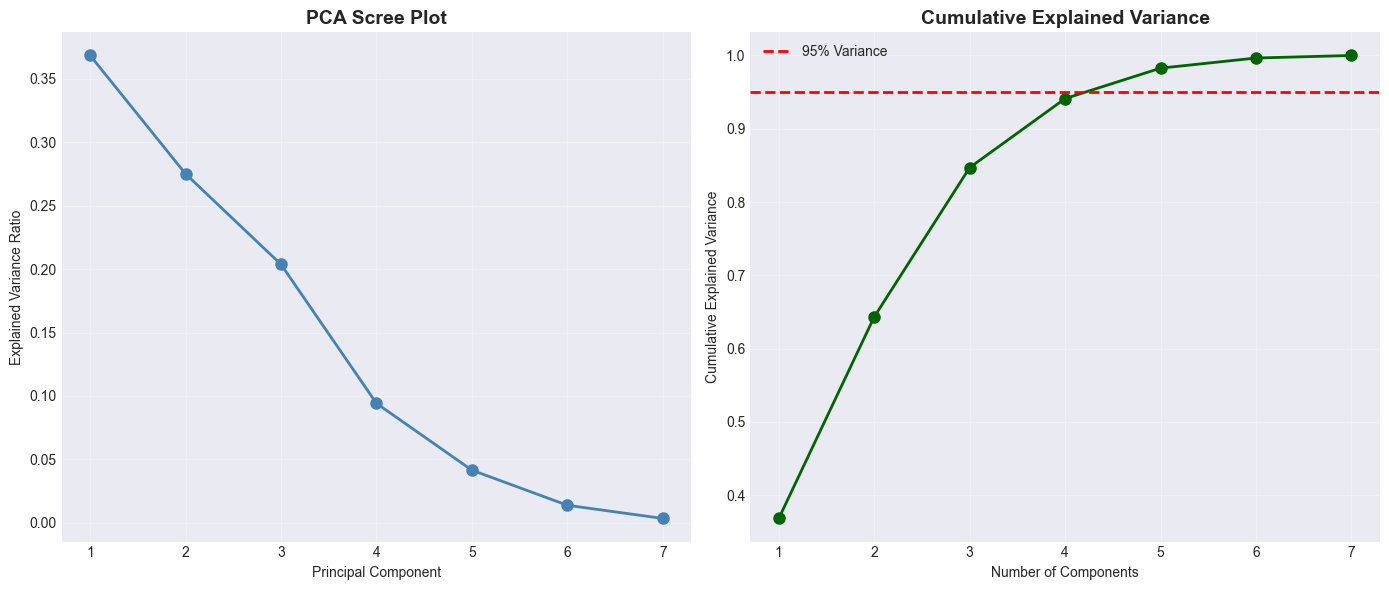


Number of components for 95% variance: 5


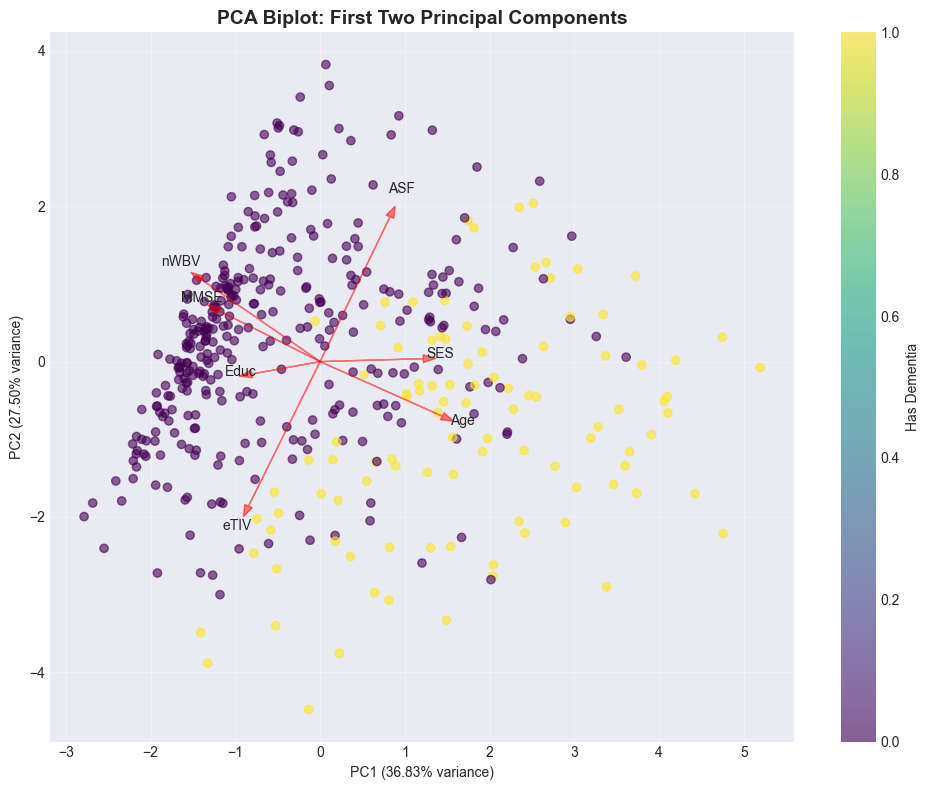


ML PREPROCESSING PIPELINE RECOMMENDATIONS

1. MISSING VALUE IMPUTATION:
   - Use median imputation for numeric features (already implemented)
   - Consider creating missing indicators for features with >10% missing
   - For longitudinal data, consider forward-fill or interpolation within subjects

2. FEATURE SCALING:
   - StandardScaler recommended for SVM, Neural Networks
   - MinMaxScaler for algorithms requiring bounded inputs
   - RobustScaler if outliers are retained
   - Tree-based models (Random Forest, XGBoost) don't require scaling

3. CATEGORICAL ENCODING:
   - One-hot encoding for: Gender (M/F), Handedness, Group (if used)
   - Ordinal encoding for: Education levels, Age groups
   - Target encoding for high-cardinality features if any

4. CLASS IMBALANCE HANDLING:
   - Dementia class ratio: {0: 0.7706422018348624, 1: 0.22935779816513763}
   - Consider SMOTE or ADASYN for oversampling minority class
   - Or use class_weight='balanced' in classifiers
   - Stratified train-tes

In [5]:
# Written for OASIS Brain Imaging Dataset Analysis
# Comprehensive analysis of cross-sectional and longitudinal datasets for machine learning classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats import kruskal
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

# =============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

print("=" * 80)
print("OASIS BRAIN IMAGING DATASET ANALYSIS")
print("=" * 80)

# Load both datasets
df_cross = pd.read_csv('data/oasis_cross-sectional.csv')
df_long = pd.read_csv('data/oasis_longitudinal.csv')

print("\nCROSS-SECTIONAL DATASET:")
print(f"Shape: {df_cross.shape}")
print(f"Columns: {list(df_cross.columns)}")

print("\nLONGITUDINAL DATASET:")
print(f"Shape: {df_long.shape}")
print(f"Columns: {list(df_long.columns)}")

# Display first few rows
print("\nCross-sectional - First 5 rows:")
print(df_cross.head())

print("\nLongitudinal - First 5 rows:")
print(df_long.head())

# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

def assess_data_quality(df, dataset_name):
    print(f"\n{dataset_name} Dataset Quality:")
    print("-" * 40)
    
    # Data types
    print("\nData Types:")
    print(df.dtypes)
    
    # Missing values
    print("\nMissing Values:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({
        'Missing_Count': missing,
        'Missing_Percentage': missing_pct
    })
    print(missing_df[missing_df['Missing_Count'] > 0])
    
    # Duplicates
    if 'ID' in df.columns:
        dup_ids = df['ID'].duplicated().sum()
        print(f"\nDuplicate IDs: {dup_ids}")
    elif 'Subject ID' in df.columns:
        dup_subjects = df['Subject ID'].duplicated().sum()
        print(f"\nDuplicate Subject IDs: {dup_subjects}")
    
    # Basic statistics
    print("\nNumeric Features Statistics:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(df[numeric_cols].describe())
    
    return missing_df, numeric_cols

missing_cross, numeric_cols_cross = assess_data_quality(df_cross, "Cross-sectional")
missing_long, numeric_cols_long = assess_data_quality(df_long, "Longitudinal")

# =============================================================================
# 3. DATA PREPROCESSING AND FEATURE ENGINEERING
# =============================================================================

print("\n" + "=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

# Handle missing values
print("\nHandling Missing Values...")

# For cross-sectional data
imputer = SimpleImputer(strategy='median')
for col in numeric_cols_cross:
    if df_cross[col].isnull().any():
        df_cross[col] = imputer.fit_transform(df_cross[[col]])

# For longitudinal data
for col in numeric_cols_long:
    if df_long[col].isnull().any():
        df_long[col] = imputer.fit_transform(df_long[[col]])

# Create CDR categories for classification
def categorize_cdr(cdr):
    if pd.isna(cdr):
        return 'Unknown'
    elif cdr == 0:
        return 'Normal'
    elif cdr == 0.5:
        return 'Very Mild Dementia'
    elif cdr == 1:
        return 'Mild Dementia'
    elif cdr >= 2:
        return 'Moderate/Severe Dementia'
    else:
        return 'Unknown'

df_cross['CDR_Category'] = df_cross['CDR'].apply(categorize_cdr)
df_long['CDR_Category'] = df_long['CDR'].apply(categorize_cdr)

# Feature engineering
print("\nFeature Engineering...")

# Brain volume ratios
df_cross['Brain_to_Skull_Ratio'] = df_cross['nWBV'] / df_cross['ASF']
df_long['Brain_to_Skull_Ratio'] = df_long['nWBV'] / df_long['ASF']

# Age groups
def categorize_age(age):
    if age < 65:
        return 'Young-Old'
    elif age < 75:
        return 'Middle-Old'
    elif age < 85:
        return 'Old-Old'
    else:
        return 'Oldest-Old'

df_cross['Age_Group'] = df_cross['Age'].apply(categorize_age)
df_long['Age_Group'] = df_long['Age'].apply(categorize_age)

# Education level categories
def categorize_education(educ):
    if pd.isna(educ):
        return 'Unknown'
    elif educ < 12:
        return 'Less than High School'
    elif educ == 12:
        return 'High School'
    elif educ <= 16:
        return 'Some College/Bachelor'
    else:
        return 'Post-Graduate'

df_cross['Education_Level'] = df_cross['Educ'].apply(categorize_education)
df_long['Education_Level'] = df_long['EDUC'].apply(categorize_education)

# =============================================================================
# 4. UNIVARIATE ANALYSIS - DISTRIBUTION OF FEATURES
# =============================================================================

print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS")
print("=" * 80)

# Analyze cross-sectional numeric features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols_cross):
    if idx < len(axes):
        axes[idx].hist(df_cross[col].dropna(), bins=30, edgecolor='black', 
                      alpha=0.7, color='steelblue')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
        
        # Add mean and median lines
        mean_val = df_cross[col].mean()
        median_val = df_cross[col].median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                         label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, 
                         label=f'Median: {median_val:.2f}')
        axes[idx].legend()

# Hide extra subplots
for idx in range(len(numeric_cols_cross), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Cross-sectional Dataset: Feature Distributions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('cross_sectional_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Check for skewness
print("\nSkewness Analysis:")
print("\nCross-sectional Dataset:")
skewness_cross = df_cross[numeric_cols_cross].skew().sort_values(ascending=False)
print(skewness_cross)

print("\nLongitudinal Dataset:")
skewness_long = df_long[numeric_cols_long].skew().sort_values(ascending=False)
print(skewness_long)

# =============================================================================
# 5. TARGET VARIABLE ANALYSIS (CDR)
# =============================================================================

print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS (Clinical Dementia Rating)")
print("=" * 80)

# CDR distribution in both datasets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Cross-sectional CDR distribution
cdr_counts_cross = df_cross['CDR_Category'].value_counts()
ax1.bar(cdr_counts_cross.index, cdr_counts_cross.values, color='teal', alpha=0.8)
ax1.set_xlabel('CDR Category', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Cross-sectional: CDR Distribution', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Add value labels
for i, (cat, count) in enumerate(cdr_counts_cross.items()):
    ax1.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

# Longitudinal CDR distribution
cdr_counts_long = df_long['CDR_Category'].value_counts()
ax2.bar(cdr_counts_long.index, cdr_counts_long.values, color='darkgreen', alpha=0.8)
ax2.set_xlabel('CDR Category', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Longitudinal: CDR Distribution', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

# Add value labels
for i, (cat, count) in enumerate(cdr_counts_long.items()):
    ax2.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('cdr_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCDR Distribution Summary:")
print("\nCross-sectional:")
print(cdr_counts_cross)
print(f"\nPercentages:\n{(cdr_counts_cross / len(df_cross) * 100).round(2)}")

print("\nLongitudinal:")
print(cdr_counts_long)
print(f"\nPercentages:\n{(cdr_counts_long / len(df_long) * 100).round(2)}")

# =============================================================================
# 6. DEMOGRAPHIC ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("DEMOGRAPHIC ANALYSIS")
print("=" * 80)

# Gender distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Cross-sectional demographics
gender_cross = df_cross['M/F'].value_counts()
axes[0, 0].pie(gender_cross.values, labels=gender_cross.index, autopct='%1.1f%%', 
               colors=['lightblue', 'lightcoral'])
axes[0, 0].set_title('Cross-sectional: Gender Distribution', fontsize=12, fontweight='bold')

# Age distribution by CDR
df_cross.boxplot(column='Age', by='CDR_Category', ax=axes[0, 1])
axes[0, 1].set_title('Cross-sectional: Age by CDR Category', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('CDR Category')
axes[0, 1].set_ylabel('Age')

# Longitudinal demographics
gender_long = df_long['M/F'].value_counts()
axes[1, 0].pie(gender_long.values, labels=gender_long.index, autopct='%1.1f%%', 
               colors=['lightblue', 'lightcoral'])
axes[1, 0].set_title('Longitudinal: Gender Distribution', fontsize=12, fontweight='bold')

# Group distribution in longitudinal
if 'Group' in df_long.columns:
    group_counts = df_long['Group'].value_counts()
    axes[1, 1].bar(group_counts.index, group_counts.values, color='seagreen', alpha=0.8)
    axes[1, 1].set_xlabel('Group')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_title('Longitudinal: Group Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('demographic_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 7. CORRELATION ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Prepare numeric data for correlation
numeric_features_cross = ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Brain_to_Skull_Ratio']
numeric_features_cross = [f for f in numeric_features_cross if f in df_cross.columns]

# Correlation matrix for cross-sectional data
corr_matrix_cross = df_cross[numeric_features_cross].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix_cross, dtype=bool))
sns.heatmap(corr_matrix_cross, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8})
plt.title('Cross-sectional: Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix_cross.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with CDR
cdr_correlations = corr_matrix_cross['CDR'].drop('CDR').sort_values(ascending=False)
print("\nTop Features Correlated with CDR (Cross-sectional):")
print(cdr_correlations)

# Visualize CDR correlations
plt.figure(figsize=(10, 8))
colors = ['darkgreen' if x > 0 else 'darkred' for x in cdr_correlations]
plt.barh(cdr_correlations.index, cdr_correlations.values, color=colors)
plt.xlabel('Correlation with CDR', fontsize=12)
plt.title('Feature Correlations with Clinical Dementia Rating', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('cdr_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 8. BRAIN IMAGING METRICS ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("BRAIN IMAGING METRICS ANALYSIS")
print("=" * 80)

# Analyze brain volume metrics by CDR category
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# eTIV by CDR
df_cross.boxplot(column='eTIV', by='CDR_Category', ax=axes[0, 0])
axes[0, 0].set_title('Estimated Total Intracranial Volume by CDR', fontsize=12)
axes[0, 0].set_xlabel('CDR Category')
axes[0, 0].set_ylabel('eTIV')

# nWBV by CDR
df_cross.boxplot(column='nWBV', by='CDR_Category', ax=axes[0, 1])
axes[0, 1].set_title('Normalized Whole Brain Volume by CDR', fontsize=12)
axes[0, 1].set_xlabel('CDR Category')
axes[0, 1].set_ylabel('nWBV')

# Brain to Skull Ratio by CDR
df_cross.boxplot(column='Brain_to_Skull_Ratio', by='CDR_Category', ax=axes[1, 0])
axes[1, 0].set_title('Brain to Skull Ratio by CDR', fontsize=12)
axes[1, 0].set_xlabel('CDR Category')
axes[1, 0].set_ylabel('Brain to Skull Ratio')

# MMSE by CDR
df_cross.boxplot(column='MMSE', by='CDR_Category', ax=axes[1, 1])
axes[1, 1].set_title('MMSE Score by CDR', fontsize=12)
axes[1, 1].set_xlabel('CDR Category')
axes[1, 1].set_ylabel('MMSE Score')

plt.suptitle('Brain Imaging Metrics by Dementia Status', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('brain_metrics_by_cdr.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 9. LONGITUDINAL ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("LONGITUDINAL ANALYSIS")
print("=" * 80)

# Analyze progression in longitudinal data
subjects_with_multiple_visits = df_long['Subject ID'].value_counts()
subjects_with_multiple_visits = subjects_with_multiple_visits[subjects_with_multiple_visits > 1]

print(f"\nSubjects with multiple visits: {len(subjects_with_multiple_visits)}")
print(f"Total unique subjects: {df_long['Subject ID'].nunique()}")

# Analyze CDR progression
cdr_progression = []
for subject in subjects_with_multiple_visits.index[:20]:  # Analyze first 20 subjects
    subject_data = df_long[df_long['Subject ID'] == subject].sort_values('Visit')
    if len(subject_data) > 1:
        cdr_values = subject_data['CDR'].values
        cdr_change = cdr_values[-1] - cdr_values[0]
        cdr_progression.append({
            'Subject': subject,
            'Initial_CDR': cdr_values[0],
            'Final_CDR': cdr_values[-1],
            'CDR_Change': cdr_change,
            'Visits': len(subject_data)
        })

progression_df = pd.DataFrame(cdr_progression)
if len(progression_df) > 0:
    plt.figure(figsize=(12, 6))
    plt.scatter(progression_df['Initial_CDR'], progression_df['CDR_Change'], 
                s=progression_df['Visits']*50, alpha=0.6, c=progression_df['Visits'], 
                cmap='viridis')
    plt.xlabel('Initial CDR', fontsize=12)
    plt.ylabel('CDR Change', fontsize=12)
    plt.title('CDR Progression in Longitudinal Subjects', fontsize=14, fontweight='bold')
    plt.colorbar(label='Number of Visits')
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('cdr_progression.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 10. OUTLIER DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Detect outliers using IQR method
def detect_outliers_iqr(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    return pd.DataFrame(outlier_summary).T

outliers_cross = detect_outliers_iqr(df_cross, numeric_cols_cross)
print("\nCross-sectional Outliers:")
print(outliers_cross[outliers_cross['count'] > 0].sort_values('percentage', ascending=False))

# Visualize outliers
plt.figure(figsize=(12, 6))
outlier_features = outliers_cross[outliers_cross['count'] > 0].sort_values('percentage', ascending=False)
plt.bar(outlier_features.index, outlier_features['percentage'], color='coral', alpha=0.8)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage of Outliers', fontsize=12)
plt.title('Outlier Percentage by Feature (Cross-sectional)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('outlier_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 11. FEATURE IMPORTANCE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Prepare data for feature importance
# Use CDR as target (convert to binary: 0 vs >0)
df_cross['Has_Dementia'] = (df_cross['CDR'] > 0).astype(int)

# Select features for analysis
feature_cols = ['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
feature_cols = [col for col in feature_cols if col in df_cross.columns]

# Remove rows with missing values in features or target
df_clean = df_cross[feature_cols + ['Has_Dementia']].dropna()
X = df_clean[feature_cols]
y = df_clean['Has_Dementia']

# Calculate different feature importance metrics
print("\n1. Mutual Information Scores:")
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({
    'Feature': feature_cols,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)
print(mi_df)

# ANOVA F-statistic
f_scores, _ = f_classif(X, y)
f_df = pd.DataFrame({
    'Feature': feature_cols,
    'F_Score': f_scores
}).sort_values('F_Score', ascending=False)

# Visualize feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Mutual Information
mi_df.plot(x='Feature', y='MI_Score', kind='barh', ax=ax1, color='steelblue', legend=False)
ax1.set_xlabel('Mutual Information Score')
ax1.set_title('Feature Importance: Mutual Information', fontsize=12, fontweight='bold')

# F-Score
f_df.plot(x='Feature', y='F_Score', kind='barh', ax=ax2, color='darkgreen', legend=False)
ax2.set_xlabel('F-Score')
ax2.set_title('Feature Importance: ANOVA F-Score', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 12. STATISTICAL TESTS
# =============================================================================

print("\n" + "=" * 80)
print("STATISTICAL TESTS")
print("=" * 80)

# Test for differences between CDR groups
print("\n1. Kruskal-Wallis Test (Non-parametric ANOVA):")
print("Testing if brain metrics differ significantly across CDR categories\n")

for feature in ['nWBV', 'MMSE', 'Age']:
    groups = []
    for cdr_cat in df_cross['CDR_Category'].unique():
        if cdr_cat != 'Unknown':
            group_data = df_cross[df_cross['CDR_Category'] == cdr_cat][feature].dropna()
            if len(group_data) > 0:
                groups.append(group_data)
    
    if len(groups) > 1:
        h_stat, p_val = kruskal(*groups)
        print(f"{feature}:")
        print(f"  H-statistic: {h_stat:.4f}")
        print(f"  P-value: {p_val:.4f}")
        print(f"  Significant difference? {'Yes' if p_val < 0.05 else 'No'}\n")

# Gender differences in dementia prevalence
print("\n2. Chi-Square Test for Independence:")
print("Testing association between gender and dementia presence")

# Create contingency table
contingency_table = pd.crosstab(df_cross['M/F'], df_cross['Has_Dementia'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Significant association? {'Yes' if p_val < 0.05 else 'No'}")

# =============================================================================
# 13. DIMENSIONALITY REDUCTION
# =============================================================================

print("\n" + "=" * 80)
print("DIMENSIONALITY REDUCTION (PCA)")
print("=" * 80)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scree plot
ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', 
         color='steelblue', markersize=8, linewidth=2)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('PCA Scree Plot', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative variance
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-', 
         color='darkgreen', markersize=8, linewidth=2)
ax2.axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components for 95% variance: {n_components_95}")

# PCA biplot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%} variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%} variance)')
plt.title('PCA Biplot: First Two Principal Components', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Has Dementia')

# Add feature vectors
for i, feature in enumerate(feature_cols):
    plt.arrow(0, 0, pca.components_[0, i]*3, pca.components_[1, i]*3, 
              color='red', alpha=0.5, head_width=0.1)
    plt.text(pca.components_[0, i]*3.5, pca.components_[1, i]*3.5, feature, 
             fontsize=10, ha='center')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_biplot.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 14. PREPROCESSING PIPELINE RECOMMENDATIONS
# =============================================================================

print("\n" + "=" * 80)
print("ML PREPROCESSING PIPELINE RECOMMENDATIONS")
print("=" * 80)

print("\n1. MISSING VALUE IMPUTATION:")
print("   - Use median imputation for numeric features (already implemented)")
print("   - Consider creating missing indicators for features with >10% missing")
print("   - For longitudinal data, consider forward-fill or interpolation within subjects")

print("\n2. FEATURE SCALING:")
print("   - StandardScaler recommended for SVM, Neural Networks")
print("   - MinMaxScaler for algorithms requiring bounded inputs")
print("   - RobustScaler if outliers are retained")
print("   - Tree-based models (Random Forest, XGBoost) don't require scaling")

print("\n3. CATEGORICAL ENCODING:")
print("   - One-hot encoding for: Gender (M/F), Handedness, Group (if used)")
print("   - Ordinal encoding for: Education levels, Age groups")
print("   - Target encoding for high-cardinality features if any")

print("\n4. CLASS IMBALANCE HANDLING:")
dementia_ratio = df_cross['Has_Dementia'].value_counts(normalize=True)
print(f"   - Dementia class ratio: {dementia_ratio.to_dict()}")
if dementia_ratio.min() < 0.3:
    print("   - Consider SMOTE or ADASYN for oversampling minority class")
    print("   - Or use class_weight='balanced' in classifiers")
    print("   - Stratified train-test split is essential")

print("\n5. FEATURE SELECTION:")
print("   - Start with top features from mutual information analysis")
print("   - Consider removing highly correlated features (correlation > 0.9)")
print("   - Use recursive feature elimination for optimal subset")
print(f"   - Recommended initial features: {mi_df.head(5)['Feature'].tolist()}")

print("\n6. OUTLIER HANDLING:")
print("   - Consider capping outliers at 1st and 99th percentiles")
print("   - Or use isolation forest for multivariate outlier detection")
print("   - Tree-based models are robust to outliers")

print("\n7. DATA SPLITTING STRATEGY:")
print("   - Use stratified split to maintain class distribution")
print("   - For longitudinal data: ensure same subject doesn't appear in train and test")
print("   - Consider time-based split if temporal patterns are important")
print("   - Recommended split: 70% train, 15% validation, 15% test")

print("\n8. CROSS-VALIDATION:")
print("   - Use StratifiedKFold (k=5 or 10) for cross-validation")
print("   - For longitudinal: use GroupKFold with Subject ID as groups")
print("   - Consider nested CV for hyperparameter tuning")

print("\n9. RECOMMENDED ML ALGORITHMS:")
print("   - Logistic Regression (baseline)")
print("   - Random Forest (handles mixed data types well)")
print("   - XGBoost/LightGBM (excellent for tabular data)")
print("   - SVM with RBF kernel (after scaling)")
print("   - Neural Networks (if sufficient data)")
print("   - Consider ensemble methods for best performance")

# =============================================================================
# 15. SAVE PREPROCESSED DATA AND SUMMARY
# =============================================================================

# Create feature sets for ML
features_for_ml = {
    'demographic': ['Age', 'M/F', 'Educ', 'SES'],
    'cognitive': ['MMSE'],
    'brain_imaging': ['eTIV', 'nWBV', 'ASF'],
    'engineered': ['Brain_to_Skull_Ratio', 'Age_Group', 'Education_Level'],
    'target': ['CDR', 'CDR_Category', 'Has_Dementia']
}

# Save processed datasets
df_cross.to_csv('oasis_cross_processed.csv', index=False)
df_long.to_csv('oasis_long_processed.csv', index=False)

# Create summary report
summary_report = f"""
OASIS BRAIN IMAGING DATASET ANALYSIS SUMMARY
============================================

CROSS-SECTIONAL DATASET:
- Total Records: {df_cross.shape[0]}
- Total Features: {df_cross.shape[1]}
- Subjects with Dementia: {(df_cross['CDR'] > 0).sum()} ({(df_cross['CDR'] > 0).mean()*100:.1f}%)
- Age Range: {df_cross['Age'].min()}-{df_cross['Age'].max()} years
- Gender Distribution: {df_cross['M/F'].value_counts().to_dict()}

LONGITUDINAL DATASET:
- Total Records: {df_long.shape[0]}
- Unique Subjects: {df_long['Subject ID'].nunique()}
- Subjects with Multiple Visits: {len(subjects_with_multiple_visits)}
- Average Visits per Subject: {df_long.groupby('Subject ID').size().mean():.2f}

KEY FINDINGS:
1. Most Important Features for Dementia Prediction:
   {mi_df.head(5).to_string()}

2. Significant Differences Between CDR Groups:
   - MMSE scores show strong negative correlation with CDR
   - Brain volume (nWBV) decreases with dementia severity
   - Age is positively correlated with CDR

3. Missing Data:
   - Cross-sectional: Minimal missing data
   - Longitudinal: Some missing values in SES and CDR

4. Class Distribution:
   - Binary Classification (Has Dementia): {dementia_ratio.to_dict()}
   - Multi-class (CDR Categories): Imbalanced with majority in Normal/Very Mild

PREPROCESSING COMPLETED:
[x] Missing value imputation
[x] Feature engineering (brain ratios, age groups, education levels)
[x] Outlier detection
[x] Feature importance analysis
[x] Statistical testing
[x] Dimensionality reduction analysis

READY FOR ML MODELING:
- Use 'oasis_cross_processed.csv' for cross-sectional analysis
- Use 'oasis_long_processed.csv' for longitudinal analysis
- Recommended target: 'Has_Dementia' for binary or 'CDR_Category' for multi-class
- Top features identified through mutual information analysis
- Consider ensemble methods for best performance
"""

# Write with UTF-8 encoding to handle special characters
with open('oasis_analysis_summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\nFiles saved:")
print("- oasis_cross_processed.csv")
print("- oasis_long_processed.csv")
print("- oasis_analysis_summary.txt")
print("\nVisualization files:")
print("- cross_sectional_distributions.png")
print("- cdr_distributions.png")
print("- demographic_analysis.png")
print("- correlation_matrix_cross.png")
print("- cdr_correlations.png")
print("- brain_metrics_by_cdr.png")
print("- cdr_progression.png")
print("- outlier_analysis.png")
print("- feature_importance.png")
print("- pca_analysis.png")
print("- pca_biplot.png")
print("\nDataset is ready for machine learning classification!")

Cross sectional shape (436, 12)
Longitudinal shape (373, 15)
Cross sectional columns ['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Delay']
Longitudinal columns ['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
Missing values cross sectional
ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64
Duplicate rows cross sectional 0
Missing values longitudinal
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64
Duplicate rows longitudinal 0
Cross sectional numeric summary
              Age        Educ         SES       MMSE         CDR         eTIV  \
c

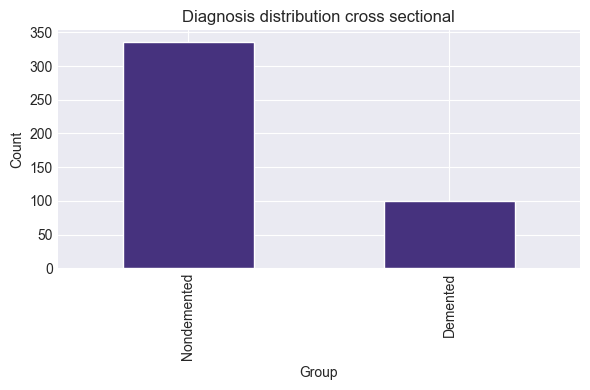

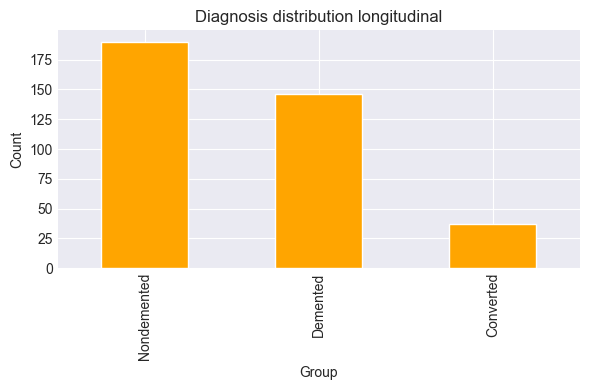

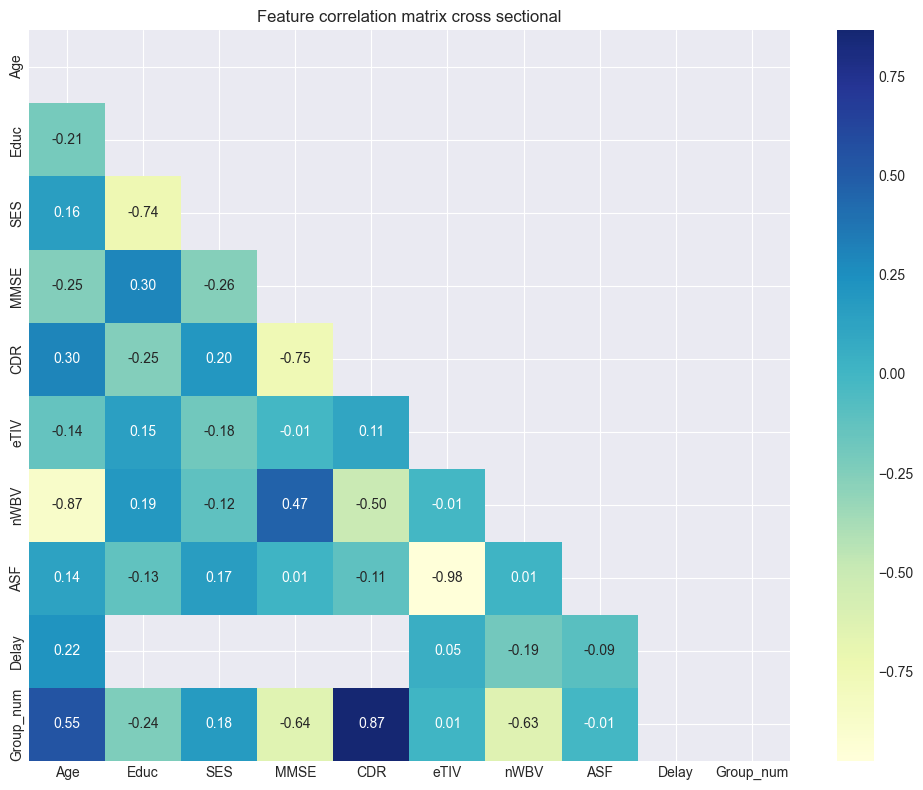

Top features positively correlated with demented status
CDR     0.865849
Age     0.549032
SES     0.181064
eTIV    0.006297
ASF    -0.006343
Name: Group_num, dtype: float64
Top features negatively correlated with demented status
ASF     -0.006343
Educ    -0.235910
nWBV    -0.634860
MMSE    -0.640151
Delay         NaN
Name: Group_num, dtype: float64


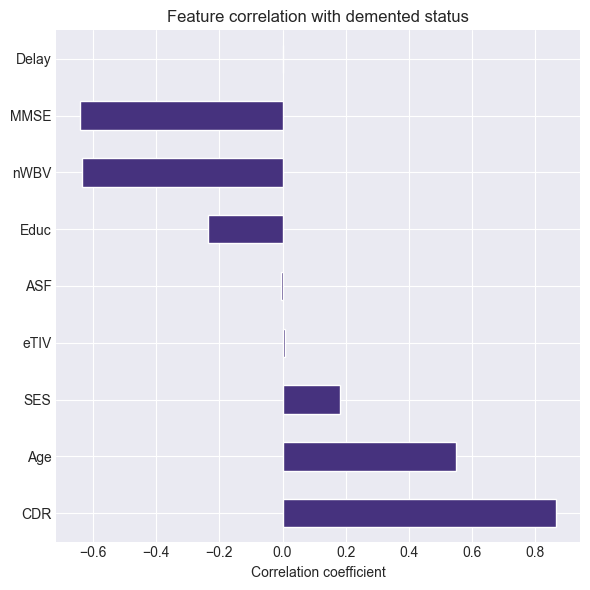

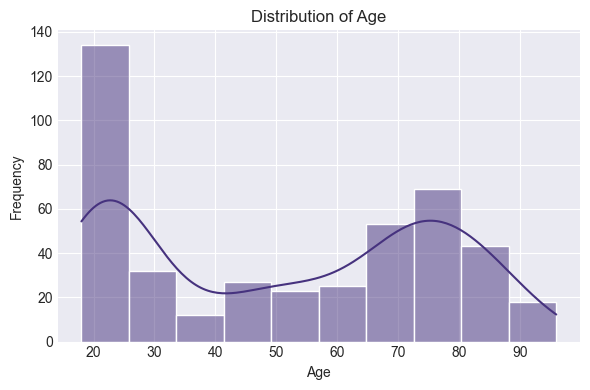

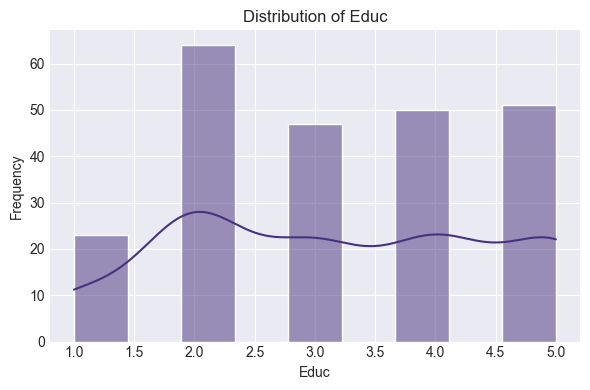

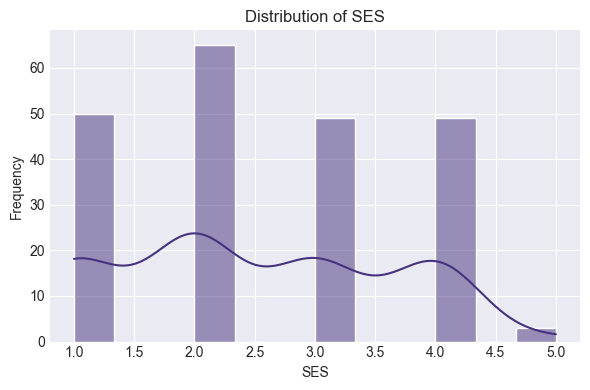

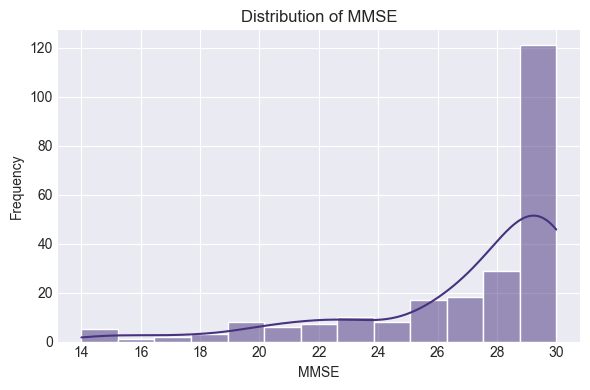

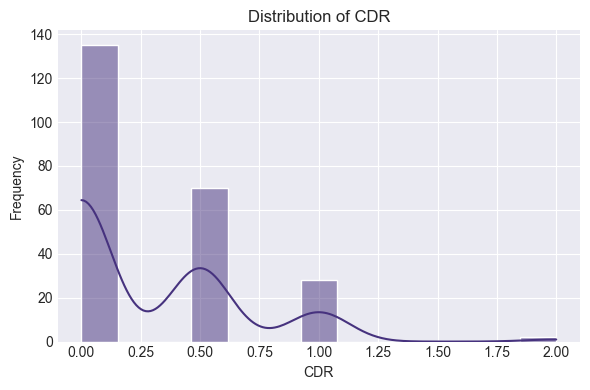

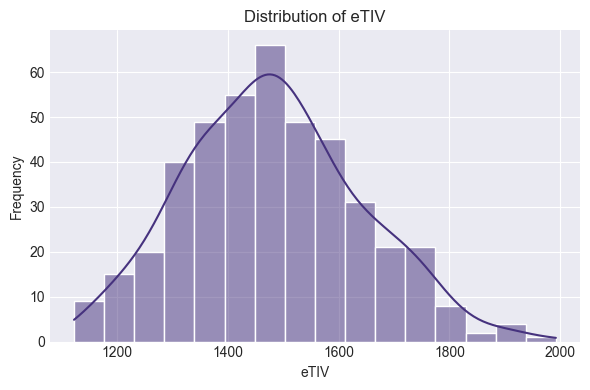

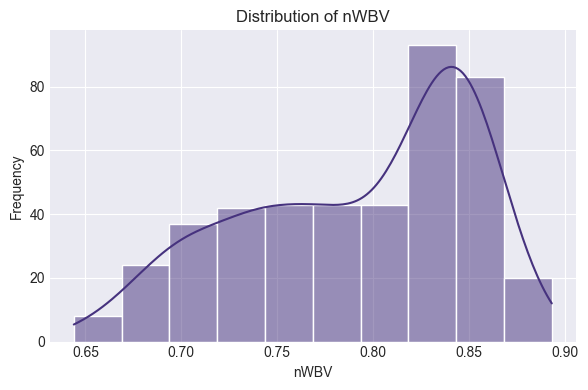

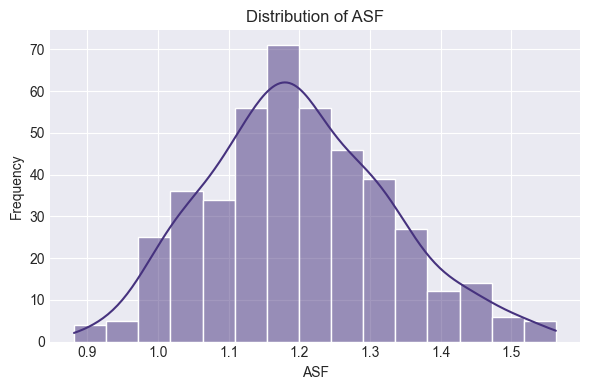

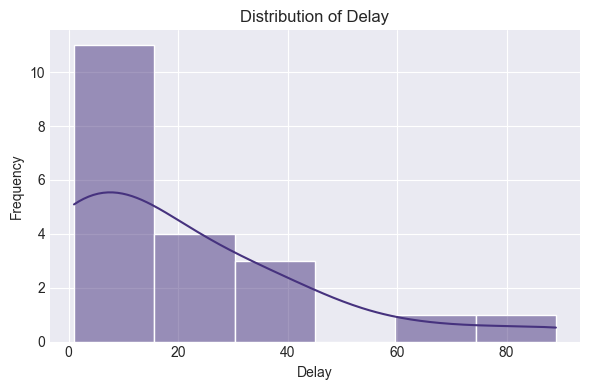

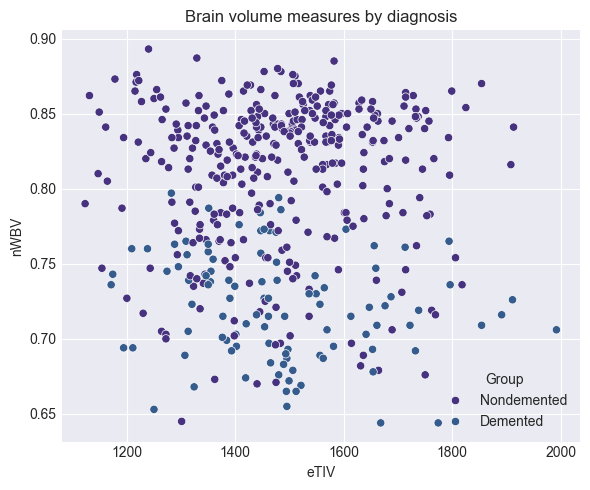

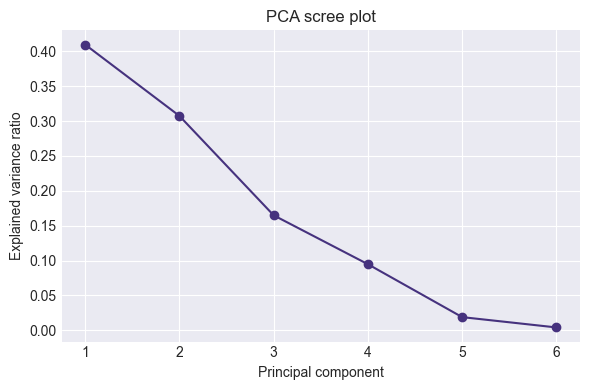

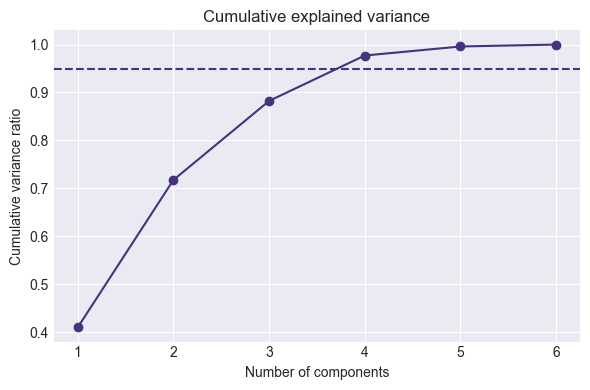

Number of components for 95% variance 4
Logistic Regression
Accuracy 0.8396946564885496
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       101
           2       0.64      0.70      0.67        30

    accuracy                           0.84       131
   macro avg       0.77      0.79      0.78       131
weighted avg       0.85      0.84      0.84       131

[[89 12]
 [ 9 21]]
ROC AUC 0.899009900990099
Random Forest
Accuracy 0.8091603053435115
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       101
           2       0.58      0.60      0.59        30

    accuracy                           0.81       131
   macro avg       0.73      0.74      0.73       131
weighted avg       0.81      0.81      0.81       131

[[88 13]
 [12 18]]
ROC AUC 0.8833333333333333
Logistic Regression cross validated ROC AUC 0.907 +/- 0.022
Random Forest cross validated ROC AUC 0.893 +/- 0.037
Analysis co

In [8]:
# Written by Ovi
# 2025-07-24
# Exploratory data analysis and baseline modeling for OASIS cross sectional and longitudinal data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# 1 Data loading
cross_df = pd.read_csv('data/oasis_cross-sectional.csv')
long_df  = pd.read_csv('data/oasis_longitudinal.csv')

# 2 Initial exploration
print('Cross sectional shape', cross_df.shape)
print('Longitudinal shape',    long_df.shape)
print('Cross sectional columns', cross_df.columns.tolist())
print('Longitudinal columns',    long_df.columns.tolist())

# 3 Data quality assessment
print('Missing values cross sectional')
print(cross_df.isnull().sum())
print('Duplicate rows cross sectional', cross_df.duplicated().sum())
print('Missing values longitudinal')
print(long_df.isnull().sum())
print('Duplicate rows longitudinal', long_df.duplicated().sum())

# 4 Summary statistics
numeric_cross = cross_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_long  = long_df.select_dtypes(include=[np.number]).columns.tolist()

print('Cross sectional numeric summary')
print(cross_df[numeric_cross].describe())
print('Longitudinal numeric summary')
print(long_df[numeric_long].describe())

# 5 Derive dementia group and map labels
cross_df['Group'] = cross_df['CDR'].apply(lambda x: 'Demented' if x > 0 else 'Nondemented')
group_map = {'Nondemented': 0, 'Converted': 1, 'Demented': 2}
cross_df['Group_num'] = cross_df['Group'].map(group_map)
long_df['Group_num']  = long_df['Group'].map(group_map)

# 6 Encode sex
sex_map = {'F': 0, 'M': 1}
cross_df['Sex_num'] = cross_df['M/F'].map(sex_map)
long_df['Sex_num']  = long_df['M/F'].map(sex_map)

# 7 Target distribution plots
plt.figure(figsize=(6,4))
cross_df['Group'].value_counts().plot(kind='bar')
plt.title('Diagnosis distribution cross sectional')
plt.xlabel('Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
long_df['Group'].value_counts().plot(kind='bar', color='orange')
plt.title('Diagnosis distribution longitudinal')
plt.xlabel('Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 8 Correlation analysis for cross sectional
corr_cols = numeric_cross + ['Group_num']
corr_matrix = cross_df[corr_cols].corr()

plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='YlGnBu', center=0)
plt.title('Feature correlation matrix cross sectional')
plt.tight_layout()
plt.show()

# 9 Top features correlated with diagnosis
group_corr = corr_matrix['Group_num'].drop('Group_num').sort_values(ascending=False)
print('Top features positively correlated with demented status')
print(group_corr.head(5))
print('Top features negatively correlated with demented status')
print(group_corr.tail(5))

plt.figure(figsize=(6,6))
group_corr.plot(kind='barh')
plt.title('Feature correlation with demented status')
plt.xlabel('Correlation coefficient')
plt.tight_layout()
plt.show()

# 10 Univariate distributions for key numeric features
for col in numeric_cross:
    plt.figure(figsize=(6,4))
    sns.histplot(cross_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 11 Bivariate scatter plot for brain measures by group
plt.figure(figsize=(6,5))
sns.scatterplot(data=cross_df, x='eTIV', y='nWBV', hue='Group')
plt.title('Brain volume measures by diagnosis')
plt.xlabel('eTIV')
plt.ylabel('nWBV')
plt.tight_layout()
plt.show()

# 12 PCA analysis on cross sectional features with median imputation
features = ['Age', 'Delay', 'eTIV', 'nWBV', 'ASF', 'Sex_num']
X_raw = cross_df[features]
y_raw = cross_df['Group_num']

# median imputation
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_raw)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained = pca.explained_variance_ratio_
cumvar = np.cumsum(explained)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title('PCA scree plot')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumvar)+1), cumvar, marker='o')
plt.axhline(0.95, linestyle='--')
plt.title('Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance ratio')
plt.tight_layout()
plt.show()

n95 = np.argmax(cumvar >= 0.95) + 1
print(f'Number of components for 95% variance {n95}')

# 13 Baseline classification models on cross sectional data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca[:, :n95], y_raw, test_size=0.3, stratify=y_raw, random_state=42
)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest':       RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(name)
    print('Accuracy', accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))
    print(confusion_matrix(y_test, preds))
    if hasattr(model, 'predict_proba'):
        print('ROC AUC', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# 14 Cross validated AUC for each model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    scores = cross_val_score(model, X_scaled[:, :n95], y_raw, cv=cv, scoring='roc_auc')
    print(f'{name} cross validated ROC AUC {scores.mean():.3f} +/- {scores.std():.3f}')

print('Analysis complete You can extend this script to use the longitudinal data for time series or conversion models')
